In [1]:
%%bash
#cleanup
rm -Rf example-part-1

# An introduction to git

According to [Wikipedia](https://en.wikipedia.org/wiki/Git):

- **Git** is a distributed version control system designed to track versions of files.
- While Git is primarily used by programmers to collaboratively develop software, it can manage version control for any type of file. 
- One of Git's unique features is that it maintains a complete local copy of the entire repository (commonly referred to as a **repo**). 
  This independence from network access or a central server sets Git apart from other tools.
- For collaboration, Git enables synchronization with repositories on **remote** machines. 
  Although all repositories with the same history are considered peers, developers often rely on a central server.

Git’s decentralized design makes it a powerful tool for both individual developers and teams working on complex projects.

## 1. Using git locally

Let's start by creating an (empty) repo:

In [2]:
%%bash
mkdir example-part-1
cd example-part-1
git init

Initialized empty Git repository in /home/pierre/code/presentation-git/example-part-1/.git/


A bit of Jupyter magic, not important for you:

In [3]:
%cd example-part-1
%pwd

/home/pierre/code/presentation-git/example-part-1


/home/pierre/code/presentation-git/venv/lib64/python3.13/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


'/home/pierre/code/presentation-git/example-part-1'

### Snapshot (*commit*)

Now, let's create a first snapshot (*i.e.*, a **commit**):

In [4]:
%%bash
# create a file
echo "Hello git!" > file1
# add it and create a commit
git add file1
git commit -m "A first commit"

[main (root-commit) c154db8] A first commit
 1 file changed, 1 insertion(+)
 create mode 100644 file1


Note that:

+ By default, a file is not tracked, so one needs to `git add` it.
+ In practice, delta are stored, not files.
+ The commit message could be whatever you want, but people generally report what has changed.

### Making and adding changes

The `git status` provides the state of the repo:

In [5]:
%%bash
git status

On branch main
nothing to commit, working tree clean


Let's introduce a change:

In [6]:
%%bash
echo "changed" > file1
git status

On branch main
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   file1

no changes added to commit (use "git add" and/or "git commit -a")


As indicated by the output, using `git commit` would report no change (and would refuse to commit). Indeed, you **need** to do `git add file1`. When you do so, the you add are **staged**, *i.e.*, ready to become part of the next commit.

Another option is to use:

In [7]:
%%bash
git commit -a -m "add file1"  # or `git -am "..."`

[main 089823d] add file1
 1 file changed, 1 insertion(+), 1 deletion(-)


And then, you can see the history of your commits with:

In [8]:
%%bash
git log

commit 089823d6b1e436bc3ed6812745519bfac3cb30e1
Author: pierre-24 <pierreb24@gmail.com>
Date:   Sat Dec 14 13:38:04 2024 +0100

    add file1

commit c154db80647f6caaa1f36eb6211c2486d7462aeb
Author: pierre-24 <pierreb24@gmail.com>
Date:   Sat Dec 14 13:38:04 2024 +0100

    A first commit


You can, of course, add multiple file at once, or even directories (with **all** their content):

In [9]:
%%bash
# add multiple files
echo "another" > file2
echo "another other" > file3
git add file2 file3
# add a directory and all(!) its content
mkdir directory
echo "another other other" > directory/file4
git add directory

The status now indicates:

In [10]:
%%bash
git status

On branch main
Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   directory/file4
	new file:   file2
	new file:   file3



Let's commit that:

In [11]:
%%bash
git commit -am "add stuffs"

[main 6e68dcb] add stuffs
 3 files changed, 3 insertions(+)
 create mode 100644 directory/file4
 create mode 100644 file2
 create mode 100644 file3


However, there are some file that you do not want to version (intermediate files, compiler logs, etc) → add them to a `.gitignore` file:

In [12]:
%%bash
echo "a log file" > test.log
git status 

On branch main
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	test.log

nothing added to commit but untracked files present (use "git add" to track)


So far, nothing new. But if I add a rule into `.gitignore`, then:

In [13]:
%%bash
echo "*.log" > .gitignore
git add .gitignore
git status 

On branch main
Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   .gitignore



... The `test.log` file is not listed. Even better, I cannot add it by mistake:

In [14]:
%%bash --no-raise-error
git add test.log

The following paths are ignored by one of your .gitignore files:
test.log
hint: Use -f if you really want to add them.
hint: Disable this message with "git config advice.addIgnoredFile false"


In practice:

+ Add one rule per line (you can use wildcards, as seen above).
+ Use <https://gitignore.io> to generate a `.gitignore` file that fits your repo.

### Branching and navigating

So far, the history is linear. But it could be nice to have to work on different things at the same time. So git introduced the concept of **branches**. In fact, git is not very useful if you work only a single branch (say, `main`), appart for the history of the modifications.

```mermaid
    gitGraph
       commit
       commit
       branch new-feature
       commit
       checkout main
       commit
       branch another-feature
       commit
```

(note: this example is ficticious)

The first branch is called `main` (or `master`, in older version of git). Good practices recommand that you keep that branch "clean", and that you do any heavy work in a separate branch that you can later "reconcile" with your main branch.

To create a new branch **from the current commit**:

In [15]:
%%bash
git switch -c new-feature  # or `git checkout -b new-feature`

Switched to a new branch 'new-feature'


Let's make some changes in that branch, for the fun of it:

In [16]:
%%bash
echo "content for new branch" > file1
git commit -am "add new feature"

[new-feature 2afe5e2] add new feature
 2 files changed, 2 insertions(+), 1 deletion(-)
 create mode 100644 .gitignore


It is, of course, possible to switch from one branch to another (**once you have commited all changes**):

In [17]:
%%bash 
cat file1
git switch main  # or `git checkout main`
cat file1

content for new branch


Switched to branch 'main'


changed


Note that you can walk trough history by different means:

+ The `git checkout` command allow you to move through history (*i.e.*, move the **index**). When you look at `git log`, you can see that all commit are associated with a hash (a long hexadecimal number). Using `git checkout xxxxxx` move you to that point. Note that it is not recommended to directly edit files from a random point in time (unless it is the last commit of the branch, of course). You can however start a new branch from that point and deal with the consequences later ;)
+ Another way to visualize changes (without moving in time) is to use `git diff xxxxxx`, which will display the changes since that commit (although in the so-called *diff* format).

In [18]:
%%bash
git switch new-feature
git log
# git diff 125b7f2

Switched to branch 'new-feature'


commit 2afe5e286aed8d9b85fa93ee1d55b5124c1bbd5f
Author: pierre-24 <pierreb24@gmail.com>
Date:   Sat Dec 14 13:38:04 2024 +0100

    add new feature

commit 6e68dcb2546c65accccf435d32869747ed8b2c8e
Author: pierre-24 <pierreb24@gmail.com>
Date:   Sat Dec 14 13:38:04 2024 +0100

    add stuffs

commit 089823d6b1e436bc3ed6812745519bfac3cb30e1
Author: pierre-24 <pierreb24@gmail.com>
Date:   Sat Dec 14 13:38:04 2024 +0100

    add file1

commit c154db80647f6caaa1f36eb6211c2486d7462aeb
Author: pierre-24 <pierreb24@gmail.com>
Date:   Sat Dec 14 13:38:04 2024 +0100

    A first commit


... So to actually navigate history and visualize, it might be easier to use graphical tools ;)

### Merging branches

So far (according to `git log`), we are in this kind of situation:

```mermaid
    gitGraph
       commit id: "A first commit"
       commit id: "add file1"
       commit id: "add stuffs"
       branch new-feature
       commit id: "add new feature"
```

Say we are happy with the changes done in `new-feature` and we want to incorporate them in `main`. This operation is a *merge*:

In [19]:
%%bash
# switch back to main
git switch main
# merge new-feature into main
git merge new-feature

Switched to branch 'main'


Updating 6e68dcb..2afe5e2
Fast-forward
 .gitignore | 1 +
 file1      | 2 +-
 2 files changed, 2 insertions(+), 1 deletion(-)
 create mode 100644 .gitignore


We will see later that this may result in conflicts, but this is not the case here.

The result of this operation is:

```mermaid
    gitGraph
       commit id: "A first commit"
       commit id: "add file1"
       commit id: "add stuffs"
       branch new-feature
       commit id: "add new feature"
       checkout main
       merge new-feature
```

Which is actually equivalent to:

```mermaid
    gitGraph
       commit id: "A first commit"
       commit id: "add file1"
       commit id: "add stuffs"
       commit id: "add new feature"
```

So the change is incorporated in `main`. Now that we are done with `new-feature`, we can delete it:

In [20]:
%%bash
git branch -d new-feature

Deleted branch new-feature (was 2afe5e2).


Note that you can also tag the current commit, so that it has a special meaning (and you can easily `git checkout THE_TAG` if any):

In [21]:
%%bash
git tag v0.2

### Dealing with conflicts: a first approach

Let's create a conflict by editing the same file in two different branches:

In [22]:
%%bash
# create a new branch and edit file2
git switch -c another-feature
echo "edited in branch another-feature" > file2
git commit -am "edit file2 in branch another-feature"
# switch back to main and also edit file2
git switch main
echo "edited in branch main" > file2
git commit -am "edit file2 in branch main"

Switched to a new branch 'another-feature'


[another-feature dcf674c] edit file2 in branch another-feature
 1 file changed, 1 insertion(+), 1 deletion(-)


Switched to branch 'main'


[main 9be9e4e] edit file2 in branch main
 1 file changed, 1 insertion(+), 1 deletion(-)


Now, if we try to merge `another-feature` in `main`, it reports a conflict:

In [23]:
%%bash --no-raise-error
git merge another-feature

Auto-merging file2
CONFLICT (content): Merge conflict in file2
Automatic merge failed; fix conflicts and then commit the result.


Note that you cannot continue to use git if you don't resolve the conflict (but you can cancel the whole operation with `git merge --abort`).

The content of the file clearly indicates the conflict:

In [24]:
%%bash
cat file2

<<<<<<< HEAD
edited in branch main
edited in branch another-feature
>>>>>>> another-feature


Here, the `=======` line indicates the divergence. All the content above this line and after `<<<<<<< HEAD` line is content that exists in the current branch. Furthermore, all content below this line and before `>>>>>>> another feature` is content that is present in the other branch.

To solve the conflict, just make up your mind on what should be the content, `git add` the conflicting file and commit the result. If you know which version is the good one, you can however use `git checkout` with `--our` (take the version of the current branch) or `--their` (take the version of the merging branch). For example:


In [25]:
%%bash
git checkout --their file2
cat file2

Updated 1 path from the index


edited in branch another-feature


or:

In [26]:
%%bash
git checkout --our file2
cat file2

Updated 1 path from the index


edited in branch main


And if we commit, we are good to go:

In [27]:
%%bash
git commit -am "solve conflict"
git log HEAD~2..HEAD

[main 65c1e4a] solve conflict
commit 65c1e4a9bfa2540da4cf3a6cf48594f4d417a634
Merge: 9be9e4e dcf674c
Author: pierre-24 <pierreb24@gmail.com>
Date:   Sat Dec 14 13:38:04 2024 +0100

    solve conflict

commit 9be9e4eff103eb2791a3f3890709bb86ee8a8800
Author: pierre-24 <pierreb24@gmail.com>
Date:   Sat Dec 14 13:38:04 2024 +0100

    edit file2 in branch main

commit dcf674c35e00ac7bae7852bfbec49b615880f444
Author: pierre-24 <pierreb24@gmail.com>
Date:   Sat Dec 14 13:38:04 2024 +0100

    edit file2 in branch another-feature


As you can see, the history now contains all commits plus the commit to solve the conflict. We will see below that there are other strategies to deal with conflicts ;)

### Going further

We have covered the most useful commands (there are still a few worth of our attention below). However, to do more complicated stuffs (and mess up your history if you really want to), you can check:

+ `git revert`: make a new commit that revert the effect of a previous one,
+ `git reset`: move the history back to a previous commit, and discard all that comes after,
+ `git commit --amend`: add the current changes to the previous commit (you can also change the commit message with `-am "xxx"`, as usual).
+ `git squash`: merge different commits into one.
+ `git cherry-pick`: select different commit from anywhere in your history and apply them in the current branch.

## 2. Working with a remote (that you created or on which you can write)

**Many of the commands in this section needs to be adapted to works in your case.**

In preamble: a bit of black magic so that everything works:

In [28]:
%%bash
../reset_for_part2.sh

X11 forwarding request failed on channel 0
From github.com:pierre-24/test-repo-git
 * [new branch]      a-remote-branch   -> originx/a-remote-branch
 * [new branch]      an-example-branch -> originx/an-example-branch
 * [new branch]      branch-fail-tests -> originx/branch-fail-tests
 * [new branch]      main              -> originx/main
X11 forwarding request failed on channel 0
To github.com:pierre-24/test-repo-git.git
 + 4094de8...65c1e4a main -> main (forced update)


branch 'main' set up to track 'originx/main'.


error: branch 'a-remote-branch' not found
X11 forwarding request failed on channel 0
To github.com:pierre-24/test-repo-git.git
 - [deleted]         a-remote-branch
Switched to a new branch 'a-remote-branch'


[a-remote-branch c7b5153] add remote_file
 1 file changed, 1 insertion(+)
 create mode 100644 remote_file


Switched to branch 'main'


Your branch is up to date with 'originx/main'.


X11 forwarding request failed on channel 0
remote: 
remote: Create a pull request for 'a-remote-branch' on GitHub by visiting:        
remote:      https://github.com/pierre-24/test-repo-git/pull/new/a-remote-branch        
remote: 
To github.com:pierre-24/test-repo-git.git
 * [new branch]      a-remote-branch -> a-remote-branch
error: the branch 'a-remote-branch' is not fully merged
hint: If you are sure you want to delete it, run 'git branch -D a-remote-branch'
hint: Disable this message with "git config advice.forceDeleteBranch false"
X11 forwarding request failed on channel 0
To github.com:pierre-24/test-repo-git.git
 - [deleted]         an-example-branch
X11 forwarding request failed on channel 0
To github.com:pierre-24/test-repo-git.git
 - [deleted]         branch-fail-tests


So far, our repo only exists in our computer. This is not very useful for sharing (or collaborative work, se below), so one needs to synchronize it with a *remote* location. Let's consider two platforms (there are other, with similar workflows): Github and Gitlab (the latter is available at UNamur at <https://gitlab.unamur.be>).

### Create a repository on a remote and synchronize with it

On github, the first step is to create a **new repository**:

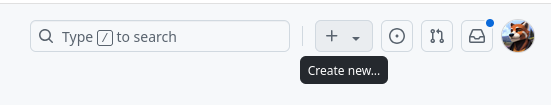

On gitlab, you need to create a **new project**:

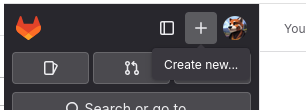

In both cases, once the repo is created, the next step is to add the remote (which is conventionaly called `origin`):

In [29]:
%%bash
# add remote
git remote add origin git@github.com:pierre-24/test-repo-git.git

**Note:** for this to work, you need to have configured Github/Gitlab with a SSH key (see <https://docs.github.com/en/authentication/connecting-to-github-with-ssh/generating-a-new-ssh-key-and-adding-it-to-the-ssh-agent> and then <https://docs.github.com/en/authentication/connecting-to-github-with-ssh/adding-a-new-ssh-key-to-your-github-account>, similar procedures exists for gitlab). It is good practice to do so.

Next step is to send your `main` branch to the repo:

In [30]:
%%bash
git push -u origin main

X11 forwarding request failed on channel 0
Everything up-to-date


branch 'main' set up to track 'origin/main'.


Notice that the output mention that, thanks to `-u` (`--upstream`), `main` is set up to track `origin/main`, which is a copy of the former in the repo. Both branches are linked, and local/remote change can be easily synchronized, as we will see later.

### Sending your changes to `origin`

Now, you need to regularly synchronize with `origin`. Let's introduce a new commit:

In [31]:
%%bash
echo "yet another change" > file1
git commit -am "yet another change"

[main 6c13873] yet another change
 1 file changed, 1 insertion(+), 1 deletion(-)


Rigth now, this commit is not yet in the remote repo, as seen in <https://github.com/pierre-24/test-repo-git/commits/main/>. To send it:

In [32]:
%%bash
git push

X11 forwarding request failed on channel 0
To github.com:pierre-24/test-repo-git.git
   65c1e4a..6c13873  main -> main


No need to use `git push origin main`, as git knows that `main` tracks `origin/main`.

If you create a new branch, you also need to push it:

In [33]:
%%bash
# create a new branch for the fun of it
git switch -c an-example-branch
# make a commit in that branch
echo "modified" > file1
git commit -am "yet another example"
# now, send it to origin
git push -u origin an-example-branch

Switched to a new branch 'an-example-branch'


[an-example-branch bd66bb0] yet another example
 1 file changed, 1 insertion(+), 1 deletion(-)


X11 forwarding request failed on channel 0
remote: 
remote: Create a pull request for 'an-example-branch' on GitHub by visiting:        
remote:      https://github.com/pierre-24/test-repo-git/pull/new/an-example-branch        
remote: 
To github.com:pierre-24/test-repo-git.git
 * [new branch]      an-example-branch -> an-example-branch


branch 'an-example-branch' set up to track 'origin/an-example-branch'.


This new branch is now visible at <https://github.com/pierre-24/test-repo-git/branches>. We'll see below that it is possible to do the merge on Github (and it is generally preferable), but if you do it manually, just use `git push` at the end:

In [34]:
%%bash
git switch main
git merge an-example-branch
git push

Switched to branch 'main'


Your branch is up to date with 'origin/main'.
Updating 6c13873..bd66bb0
Fast-forward
 file1 | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


X11 forwarding request failed on channel 0
To github.com:pierre-24/test-repo-git.git
   6c13873..bd66bb0  main -> main


And now, as seen at <https://github.com/pierre-24/test-repo-git/commits/main/>, this last commit is there. You may want to delete your branch on the remote at <https://github.com/pierre-24/test-repo-git/branches>, thought.

By the way, you know enough to understand this joke:

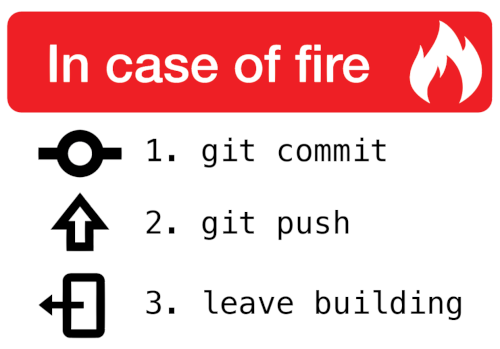

### Getting changes from the remote

As mentioned above, good practice is that you keep `main` up to date with the latest development, but do not directly make change in it (rather, you create a new branch, make changes there, tests them, and when you are happy, you *merge* back to `main`). This means that, if you start to collaborate, your remote `main` branch should update from time to time, and such change should be reflected locally (otherwise, you'll start to get in trouble since your local and remote history diverges). Let's see how to correctly deal with that.

First of all, to keep in touch with the changes in `origin`, you can do:

In [35]:
%%bash
git fetch origin

X11 forwarding request failed on channel 0
From github.com:pierre-24/test-repo-git
 * [new branch]      a-remote-branch -> origin/a-remote-branch


As you can see, there is a new branch, called `origin/a-remote-branch` that exists in the remote (as indicated by the prefix `origin`), and was just created locally. If you want to work on this branch, just switch to it:

In [36]:
%%bash
git switch a-remote-branch

Switched to branch 'a-remote-branch'


One can of course introduce more changes (but let's not forget to *push* them):

In [37]:
%%bash
echo "I start to get out of idea" > file2
git commit -am "changed file2"
git push -u origin a-remote-branch

[a-remote-branch eb75aeb] changed file2
 1 file changed, 1 insertion(+), 1 deletion(-)


X11 forwarding request failed on channel 0
To github.com:pierre-24/test-repo-git.git
   c7b5153..eb75aeb  a-remote-branch -> a-remote-branch


branch 'a-remote-branch' set up to track 'origin/a-remote-branch'.


Github sees our changes and propose us to do a so-called *pull request*:

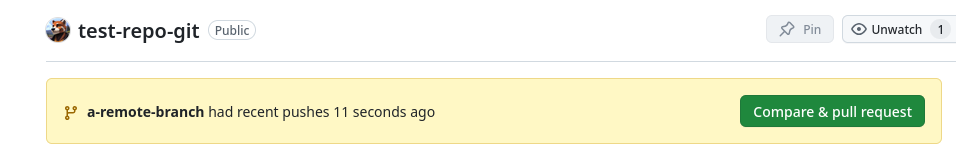

A *pull request* is the way to merge two branches directly on Github, which has its advantages when working collaborativelly (see below).

If this message does not appear, no worry: we can also do that by going in the "Pull requests" tab of the repo:

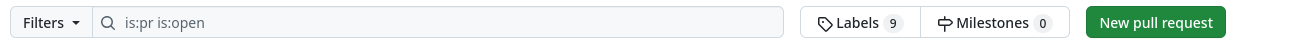

In there, let's request a merge `main` ← `a-remote-branch` (yeah, it is written backward).

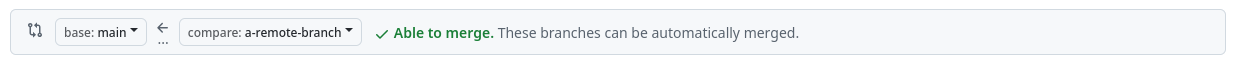

Note that it indicates if there is a conflict or not (more on that latter).

A pull request is created. One can review the changes (**very important**) and accept them, which will trigger a *merge* on the remote side.

The procedure is very similar in *gitlab* (except it is called a *merge request*).

Thus, one needs to update the local `main` branch:

In [38]:
%%bash
git switch main
git pull

Switched to branch 'main'


Your branch is up to date with 'origin/main'.


X11 forwarding request failed on channel 0


Already up to date.


`git` pull is in fact a shortcut for `git fetch` +  `git merge origin/main`.

**In short:** everytime you need to update a local branch so that it reflects the remote branch, use `git pull`.

### Bonus track: GitHub actions

What is nice about GitHub (this is not available [yet?] on the UNamur's gitlab) is that you can run some actions when something happens in you repo. For example:

+ You can automatically run some tests to check wheter the pull request you received did not break anything (more on that in the Python lecture),
+ You can update a website with your documentation (more on that in the Python lecture),
+ and others.

To use that, you need to put a specially formated YAML file in `.github/workflows/`. Let's try that:

In [39]:
%%bash
# create directory and copy file (see below)
mkdir -p .github/workflows
cp ../tests.yml .github/workflows
# add file, commit, and send:
git add .github/workflows/tests.yml
git commit -am "add test"
git push

[main 0f96fbb] add test
 1 file changed, 23 insertions(+)
 create mode 100644 .github/workflows/tests.yml


X11 forwarding request failed on channel 0
To github.com:pierre-24/test-repo-git.git
   bd66bb0..0f96fbb  main -> main


The green tick there...

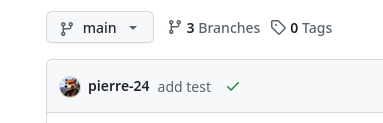

... indicates that the test went well. Now, let's check out the content of this file:

In [40]:
%%bash
cat .github/workflows/tests.yml

name: Run tests

on:
  push:
    branches: [ main ]
  pull_request:
    branches: [ main ]

jobs:
  build:
    runs-on: ubuntu-latest
    strategy:
      fail-fast: false
    steps:
      - uses: actions/checkout@v3  # mandatory
      # then, put any step you want there:
      - name: check that file1 exists
        run: |
          if [[ -e file1 ]]; then 
            exit 0
          else 
            exit 1
          fi


In short (this is a huge topic and I only scratch the surface here, see <https://docs.github.com/en/actions>), the template for a an action file is:

```yaml
on:
  %an-event%
job:
  a-job:
    runs-on: %a-runner%
    steps:
      - step 1
      - setp 2
      - ...
```

where `%an-event%` is an event that happens in the remote (in the example above, this file is triggered on any pull requests that target `main` and any `git push` that targets `main`) and `%a-runner%` is a **virtual machine** set up by Github to run our test (here, the LTS of ubuntu). This is why the first step is necessarly `uses: actions/checkout@v3`, to retrieve our repo there. Then, you can call any command you want, **as long as it is available** (but you can also use `sudo apt-get install` to install tools and stuffs).

Let's now see what this means in practice. If I ever create a branch where `file1` is deleted:

In [41]:
%%bash
# create a branch (avoid directly working in main):
git switch -c branch-fail-tests origin/main
# delete file (yeah, you can do that):
git rm file1
git commit -am "delete file1"
git push -u origin branch-fail-tests

Switched to a new branch 'branch-fail-tests'


branch 'branch-fail-tests' set up to track 'origin/main'.
rm 'file1'
[branch-fail-tests 1ce1cc2] delete file1
 1 file changed, 1 deletion(-)
 delete mode 100644 file1


X11 forwarding request failed on channel 0
remote: 
remote: Create a pull request for 'branch-fail-tests' on GitHub by visiting:        
remote:      https://github.com/pierre-24/test-repo-git/pull/new/branch-fail-tests        
remote: 
To github.com:pierre-24/test-repo-git.git
 * [new branch]      branch-fail-tests -> branch-fail-tests


branch 'branch-fail-tests' set up to track 'origin/branch-fail-tests'.


As indicated in the output, one can directly create a pull request here: <https://github.com/pierre-24/test-repo-git/pull/new/branch-fail-tests>. Let's do so, and...

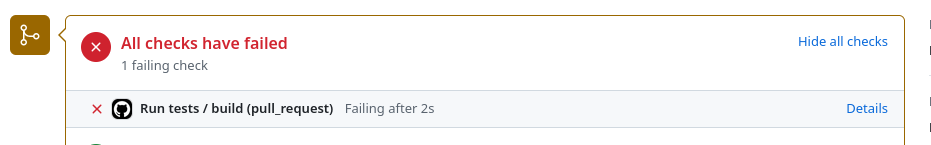

... One should probably not merge that ;)

In practice, it is the responsability of **the person that propose the pull request** to make sure that all tests passes (of course, it can be that modifying the tests is required).

**Note:** it is possible to "protect" a branch by defining a set of rules in the "branches" menu of the "Settings" tab:

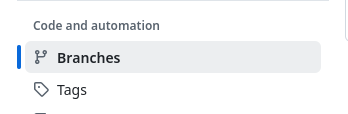

In particular, it is possible to force tests to pass before being abble to merge a pull request:

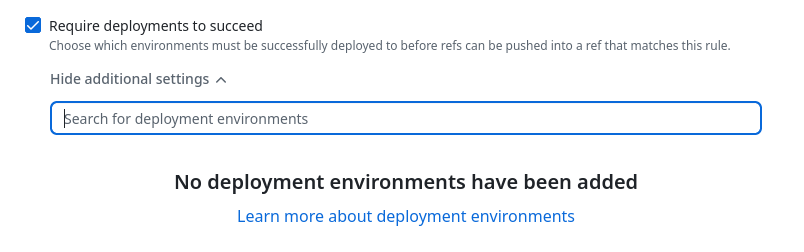